## Problem 1
Gradient Descent and Stochastic Gradient Descent. Suppose we have training data $\{x_i, y_i\}_{i=1}^m$,
with $x_i ∈ R^n$ and $y_i$ is a scalar label. Derive gradient descent and SGD algorithms to solve the following L1-loss optimization:
\begin{equation*}
\min_{w \in R^n} \sum_{i=1}^m \mid y_i-x_i^\intercal w \mid
\end{equation*}
a) Simulate this problem as follows. Generate each $x_i$ as random points in the interval $[0, 1]$ and
generate $y_i = w_1x_i + w_2 + ϵ_i$, where $w_1$ and $w_2$ are the slope and intercept of a line (of your
choice) and $ϵ_i$ = randn, a Gaussian random error generated in Matlab or python. With m = 10.
Repeat this experiment with several different datasets (with different random errors in each
case).

In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [311]:
# inputs
m,n = 10, 2
w1 = 5 # slope
w2 = 3 # intercept

In [312]:
def gen_data(m, w1, w2):
    w = np.hstack((w1,w2))
    X = np.hstack((np.random.rand(m,1), np.ones((m,1))))
    error = np.random.normal(size=(m,1))
    y = (X@w).reshape(m,1) + error
    return (X, y)

In [313]:
# dataset 1
X1, y1 = gen_data(m, w1, w2)

# dataset 2
X2, y2 = gen_data(m, w1, w2)

# dataset 3
X3, y3 = gen_data(m, w1, w2)

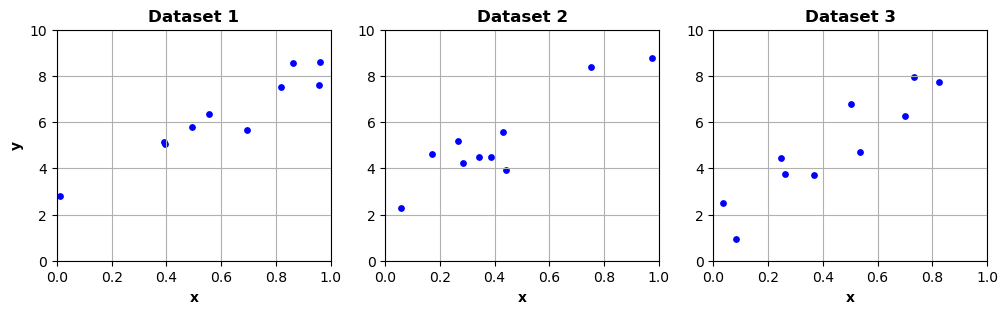

In [353]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(X1[:,:1],y1,s=15,c='b')
plt.ylim([0,10])
plt.xlim([0,1])
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 1",fontweight="bold")
plt.grid()

plt.subplot(1,3,2)
plt.scatter(X2[:,:1],y2,s=15,c='b')
plt.ylim([0,10])
plt.xlim([0,1])
plt.xlabel("x",fontweight="bold")
plt.title("Dataset 2",fontweight="bold")
plt.grid()

plt.subplot(1,3,3)
plt.scatter(X3[:,:1],y3,s=15,c='b')
plt.ylim([0,10])
plt.xlim([0,1])
plt.xlabel("x",fontweight="bold")
plt.title("Dataset 3",fontweight="bold")
plt.grid();

b) Implement the GD or SGD algorithm for the L1-loss optimization. Compare the solution to this optimization with the LS line fit.

In [280]:
def squared_loss(y, y_pred):
    return np.mean((y-y_pred)**2)

In [499]:
def gd(X,y,lr=0.01, n_iter=1000):
    w_gd = np.zeros((n,1))
    lr = lr
    n_iter = n_iter
    sqrd_loss_gd = []

    for _ in range(n_iter):
        grad = -X.T @ np.sign(y-X@w_gd)
        w_gd -= (lr * grad)
        sqrd_loss_gd.append(squared_loss(y, X@w_gd))

    print(f"Gradient Descent Results:\n\tw1: {w_gd[0].item():.4f}\n\tw2: {w_gd[1].item():.4f}")
    
    return (w_gd, sqrd_loss_gd)

In [478]:
w_gd_1, sqrd_loss_gd_1 = gd(X1, y1)

Gradient Descent Results:
	w1: 6.1017
	w2: 2.7200


In [479]:
w_gd_2, sqrd_loss_gd_2 = gd(X2, y2)

Gradient Descent Results:
	w1: 6.6764
	w2: 2.3200


In [480]:
w_gd_3, sqrd_loss_gd_3 = gd(X3, y3)

Gradient Descent Results:
	w1: 7.0619
	w2: 1.9400


In [500]:
# stochastic gradient descent
def sgd(X,y,lr=0.01, n_iter=1000):
    w_sgd = np.zeros((n,1))
    learning_rate = 0.01
    num_iterations = n_iter
    sqrd_loss_sgd = []

    for i in range(num_iterations):
        # shuffle the training data at the beginning of each epoch
        idx = np.random.permutation(m)
        X_shuffled = X[idx]
        y_shuffled = y[idx]

        for j in range(0, m):
            X_sample = X_shuffled[j:j+1]
            y_sample = y_shuffled[j:j+1]
            grad = -X_sample.T @ np.sign(y_sample - X_sample @ w_sgd)
            w_sgd -= learning_rate * grad
            sqrd_loss_sgd.append(squared_loss(y, X@w_sgd))

    print(f"Stochastic Gradient Descent Results:\n\tw1: {w_sgd[0].item():.4f}\n\tw2: {w_sgd[1].item():.4f}")
    
    return (w_sgd, sqrd_loss_sgd)

In [482]:
w_sgd_1, sqrd_loss_sgd_1 = sgd(X1, y1)

Stochastic Gradient Descent Results:
	w1: 6.0814
	w2: 2.7200


In [483]:
w_sgd_2, sqrd_loss_sgd_2 = sgd(X2, y2)

Stochastic Gradient Descent Results:
	w1: 6.6537
	w2: 2.2800


In [484]:
w_sgd_3, sqrd_loss_sgd_3 = sgd(X3, y3)

Stochastic Gradient Descent Results:
	w1: 7.0480
	w2: 1.9400


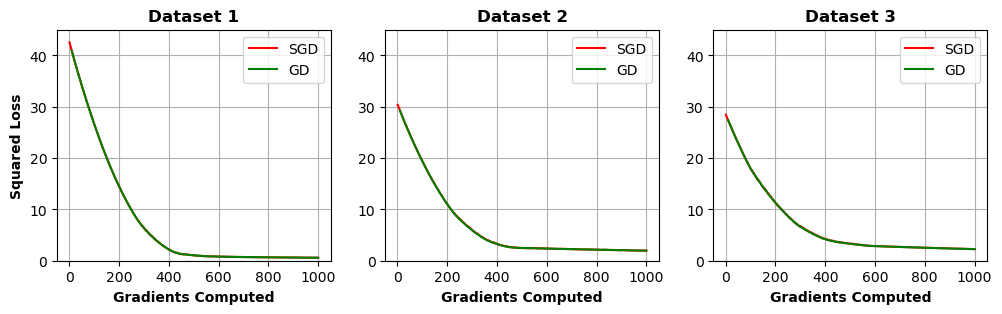

In [475]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(np.arange(1,1001,1),sqrd_loss_sgd_1, c='r',label="SGD")
plt.plot(np.arange(10,1001,10),sqrd_loss_gd_1, c='g',label="GD")
plt.legend()
plt.grid()
plt.ylim([0,45])
plt.xlabel("Gradients Computed",fontweight="bold")
plt.ylabel("Squared Loss",fontweight="bold")
plt.title("Dataset 1",fontweight="bold")

plt.subplot(1,3,2)
plt.plot(np.arange(1,1001,1),sqrd_loss_sgd_2, c='r',label="SGD")
plt.plot(np.arange(10,1001,10),sqrd_loss_gd_2, c='g',label="GD")
plt.legend()
plt.grid()
plt.ylim([0,45])
plt.xlabel("Gradients Computed",fontweight="bold")
plt.title("Dataset 2",fontweight="bold")

plt.subplot(1,3,3)
plt.plot(np.arange(1,1001,1),sqrd_loss_sgd_3, c='r',label="SGD")
plt.plot(np.arange(10,1001,10),sqrd_loss_gd_3, c='g',label="GD")
plt.legend()
plt.grid()
plt.ylim([0,45])
plt.xlabel("Gradients Computed",fontweight="bold")
plt.title("Dataset 3",fontweight="bold");

In [340]:
# Least-Squares
w_ls_1 = np.linalg.inv(X1.T@X1)@X1.T@y1
print(f"Least Squares Results:\n\tw1: {w_ls_1[0].item():.4f}\n\tw2: {w_ls_1[1].item():.4f}")

Least Squares Results:
	w1: 5.6875
	w2: 2.8124


In [341]:
w_ls_2 = np.linalg.inv(X2.T@X2)@X2.T@y2
print(f"Least Squares Results:\n\tw1: {w_ls_2[0].item():.4f}\n\tw2: {w_ls_2[1].item():.4f}")

Least Squares Results:
	w1: 6.7319
	w2: 2.4274


In [342]:
w_ls_3 = np.linalg.inv(X3.T@X3)@X3.T@y3
print(f"Least Squares Results:\n\tw1: {w_ls_3[0].item():.4f}\n\tw2: {w_ls_3[1].item():.4f}")

Least Squares Results:
	w1: 7.6513
	w2: 1.6054


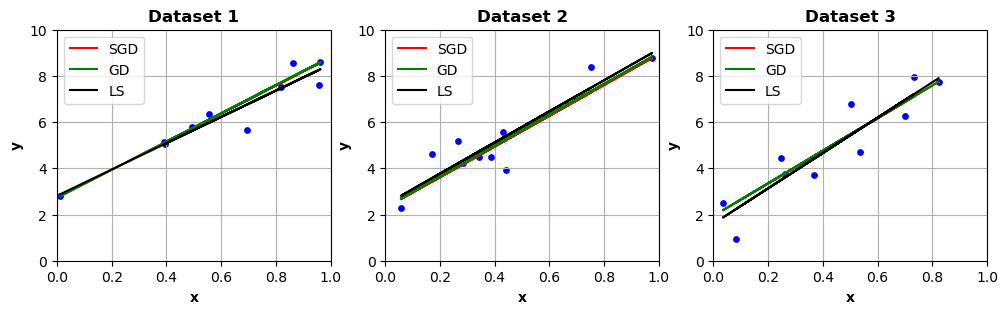

In [485]:
plt.figure(figsize=(12,3))
y_sgd_1 = X1@w_sgd_1
y_gd_1 = X1@w_gd_1
y_ls_1 = X1@w_ls_1
plt.subplot(1,3,1)
plt.xlim([0,1])
plt.ylim([0,10])
plt.scatter(X1[:,:1],y1, s=15,c='b')
plt.plot(X1[:,:1],y_sgd_1, c='r',label="SGD")
plt.plot(X1[:,:1],y_gd_1, c='g',label="GD")
plt.plot(X1[:,:1],y_ls_1, c='black',label="LS")
plt.legend()
plt.grid()
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 1",fontweight="bold")

y_sgd_2 = X2@w_sgd_2
y_gd_2 = X2@w_gd_2
y_ls_2 = X2@w_ls_2
plt.subplot(1,3,2)
plt.xlim([0,1])
plt.ylim([0,10])
plt.scatter(X2[:,:1],y2, s=15,c='b')
plt.plot(X2[:,:1],y_sgd_2, c='r',label="SGD")
plt.plot(X2[:,:1],y_gd_2, c='g',label="GD")
plt.plot(X2[:,:1],y_ls_2, c='black',label="LS")
plt.legend()
plt.grid()
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 2",fontweight="bold")

y_sgd_3 = X3@w_sgd_3
y_gd_3 = X3@w_gd_3
y_ls_3 = X3@w_ls_3
plt.subplot(1,3,3)
plt.xlim([0,1])
plt.ylim([0,10])
plt.scatter(X3[:,:1],y3, s=15,c='b')
plt.plot(X3[:,:1],y_sgd_3, c='r',label="SGD")
plt.plot(X3[:,:1],y_gd_3, c='g',label="GD")
plt.plot(X3[:,:1],y_ls_3, c='black',label="LS")
plt.legend()
plt.grid()
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 3",fontweight="bold");

c) Now change the simulation as follows. Instead of generating $ϵ_i$ as Gaussian, now generate the errors according to a Laplacian (two-sided exponential distribution) using laprnd(1,1) in Matlab or using numpy.random.laplace in python. Compare the LS and L1-loss solution
compare in this case. Repeat this experiment with several different datasets (with different
random errors in each case).

In [486]:
def gen_data_laplace(m, w1, w2):
    w = np.hstack((w1,w2))
    X = np.hstack((np.random.rand(m,1), np.ones((m,1))))
    error = np.random.laplace(loc=1,scale=1,size=(m,1))
    y = (X@w).reshape(m,1) + error
    return (X, y)

In [487]:
# dataset 1
X1, y1 = gen_data(m, w1, w2)

# dataset 2
X2, y2 = gen_data(m, w1, w2)

# dataset 3
X3, y3 = gen_data(m, w1, w2)

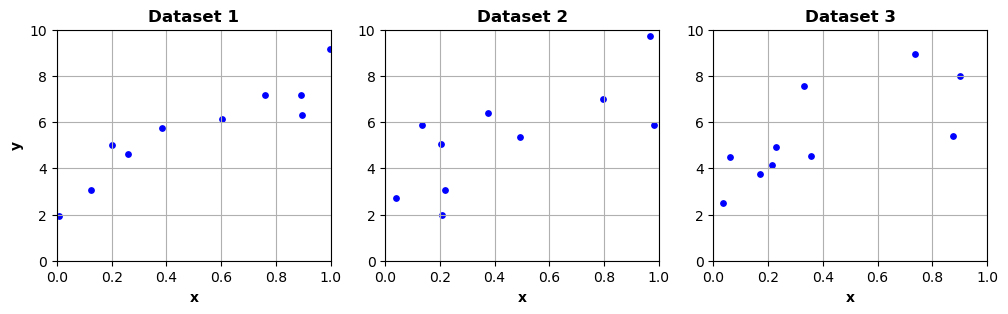

In [488]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(X1[:,:1],y1,s=15,c='b')
plt.ylim([0,10])
plt.xlim([0,1])
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 1",fontweight="bold")
plt.grid()

plt.subplot(1,3,2)
plt.scatter(X2[:,:1],y2,s=15,c='b')
plt.ylim([0,10])
plt.xlim([0,1])
plt.xlabel("x",fontweight="bold")
plt.title("Dataset 2",fontweight="bold")
plt.grid()

plt.subplot(1,3,3)
plt.scatter(X3[:,:1],y3,s=15,c='b')
plt.ylim([0,10])
plt.xlim([0,1])
plt.xlabel("x",fontweight="bold")
plt.title("Dataset 3",fontweight="bold")
plt.grid();

In [501]:
w_gd_1, sqrd_loss_gd_1 = gd(X1, y1)
w_gd_2, sqrd_loss_gd_2 = gd(X2, y2)
w_gd_3, sqrd_loss_gd_3 = gd(X3, y3)

Gradient Descent Results:
	w1: 4.9033
	w2: 3.3600
Gradient Descent Results:
	w1: 5.3646
	w2: 2.7200
Gradient Descent Results:
	w1: 5.5528
	w2: 2.9600


In [502]:
w_sgd_1, sqrd_loss_sgd_1 = sgd(X1, y1)
w_sgd_2, sqrd_loss_sgd_2 = sgd(X2, y2)
w_sgd_3, sqrd_loss_sgd_3 = sgd(X3, y3)

Stochastic Gradient Descent Results:
	w1: 4.9541
	w2: 3.3200
Stochastic Gradient Descent Results:
	w1: 5.4388
	w2: 2.6600
Stochastic Gradient Descent Results:
	w1: 5.5804
	w2: 2.9600


In [503]:
w_ls_1 = np.linalg.inv(X1.T@X1)@X1.T@y1
print(f"Least Squares Results:\n\tw1: {w_ls_1[0].item():.4f}\n\tw2: {w_ls_1[1].item():.4f}")
w_ls_2 = np.linalg.inv(X2.T@X2)@X2.T@y2
print(f"Least Squares Results:\n\tw1: {w_ls_2[0].item():.4f}\n\tw2: {w_ls_2[1].item():.4f}")
w_ls_3 = np.linalg.inv(X3.T@X3)@X3.T@y3
print(f"Least Squares Results:\n\tw1: {w_ls_3[0].item():.4f}\n\tw2: {w_ls_3[1].item():.4f}")

Least Squares Results:
	w1: 5.3193
	w2: 2.9003
Least Squares Results:
	w1: 4.8114
	w2: 3.1836
Least Squares Results:
	w1: 4.6266
	w2: 3.6178


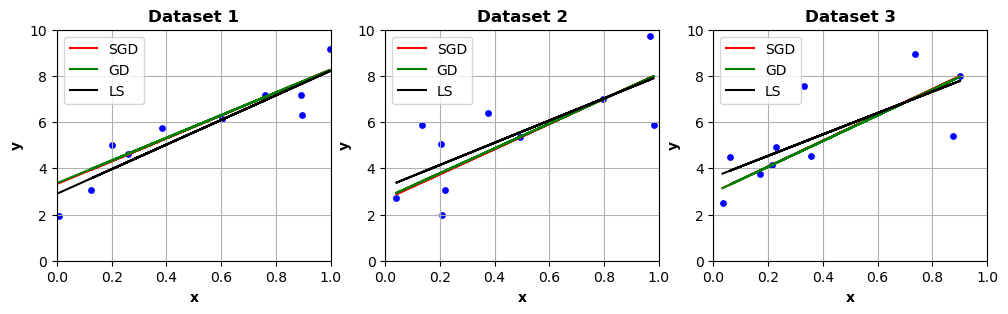

In [504]:
plt.figure(figsize=(12,3))
y_sgd_1 = X1@w_sgd_1
y_gd_1 = X1@w_gd_1
y_ls_1 = X1@w_ls_1
plt.subplot(1,3,1)
plt.xlim([0,1])
plt.ylim([0,10])
plt.scatter(X1[:,:1],y1, s=15,c='b')
plt.plot(X1[:,:1],y_sgd_1, c='r',label="SGD")
plt.plot(X1[:,:1],y_gd_1, c='g',label="GD")
plt.plot(X1[:,:1],y_ls_1, c='black',label="LS")
plt.legend()
plt.grid()
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 1",fontweight="bold")

y_sgd_2 = X2@w_sgd_2
y_gd_2 = X2@w_gd_2
y_ls_2 = X2@w_ls_2
plt.subplot(1,3,2)
plt.xlim([0,1])
plt.ylim([0,10])
plt.scatter(X2[:,:1],y2, s=15,c='b')
plt.plot(X2[:,:1],y_sgd_2, c='r',label="SGD")
plt.plot(X2[:,:1],y_gd_2, c='g',label="GD")
plt.plot(X2[:,:1],y_ls_2, c='black',label="LS")
plt.legend()
plt.grid()
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 2",fontweight="bold")

y_sgd_3 = X3@w_sgd_3
y_gd_3 = X3@w_gd_3
y_ls_3 = X3@w_ls_3
plt.subplot(1,3,3)
plt.xlim([0,1])
plt.ylim([0,10])
plt.scatter(X3[:,:1],y3, s=15,c='b')
plt.plot(X3[:,:1],y_sgd_3, c='r',label="SGD")
plt.plot(X3[:,:1],y_gd_3, c='g',label="GD")
plt.plot(X3[:,:1],y_ls_3, c='black',label="LS")
plt.legend()
plt.grid()
plt.xlabel("x",fontweight="bold")
plt.ylabel("y",fontweight="bold")
plt.title("Dataset 3",fontweight="bold");